<a href="https://colab.research.google.com/github/nazmul-kaonine/Data-Science-Papers/blob/master/Handwritten%20Digit%20Classification%20using%20Multiple%20Descriptors%20%26%20ANN/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Submitted by:
###Nazmul Kaonine
####PostGrad- UTS

# Initializing ALL libraries and loader functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn import svm 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import os
import h5py
import glob
import cv2
from keras.preprocessing import image
from sklearn import decomposition


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

0

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
                                
                              


                        
        


    return images, labels

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:

X_train, y_train = load_mnist('/content/gdrive/My Drive/DLA2/', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/DLA2/', kind='t10k')



#Some Visualizations

In [ ]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  75 177 204 187 141  78  38
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  57 243 253 253 254 253 253 249
  174   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1 226 253 252 200 169 150 191 236
  249  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  73 253 244 101   0   0   0   0   0
  186 206   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 149 253 156   0   0   0   0   0   0
  200 219   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 139 253  21   0   0   0   

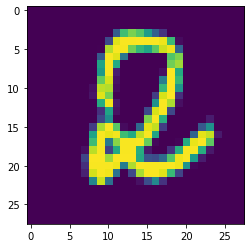

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])
print(X_train[4])



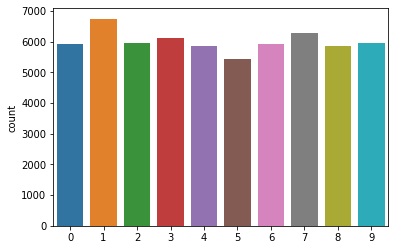

In [ ]:
sns.countplot(y_train)
plt.show()
#shows digit label counts


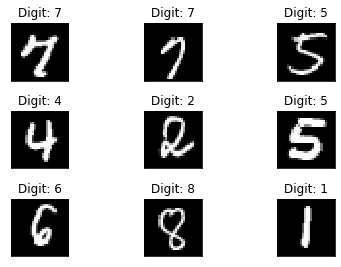

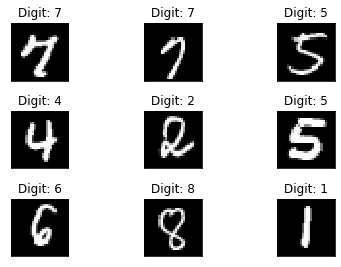

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
def display_image(position):
    image = X_train[position].squeeze()
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [ ]:
display_image(0)
plt.show()
display_image(59999)
#to view specific images

#SVM PCA

In [ ]:
X_train=X_train.reshape(-1,784)
X_test=X_test.reshape(-1,784)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_train, y_train, test_size=0.0001, random_state=42)

In [ ]:
trainImage = X_train
trainLabel = y_train
testImage = X_test
testLabel = y_test

pca = decomposition.PCA(n_components=300, whiten=True).fit(trainImage)
trainImage_PCA = pca.transform(trainImage)
testImage_PCA = pca.transform(testImage)





In [ ]:
clf=svm.SVC(C=100,kernel='poly',gamma=0.01, degree=4)
clf.fit(trainImage_PCA, trainLabel)
result = clf.predict(testImage_PCA)

In [ ]:
  print("Test set Accuracy: {:.2f}".format(clf.score(testImage_PCA,testLabel)))

In [ ]:
print("Test set predictions: {}".format(clf.predict(testImage_PCA)))


In [ ]:
print(metrics.confusion_matrix(testLabel, result))

In [ ]:
accuracy=metrics.accuracy_score(testLabel, result)

# plot the confusion matrix
cm  = metrics.confusion_matrix(testLabel, result)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

# K NEAREST NEIGHBOR PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_train, y_train, test_size=0.01, random_state=42)


In [ ]:
trainImage = X_train
trainLabel = y_train
testImage = X_test
testLabel = y_test

pca = decomposition.PCA(n_components=300, whiten=True).fit(trainImage)
trainImage_PCA = pca.transform(trainImage)
testImage_PCA = pca.transform(testImage)

In [ ]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(trainImage_PCA, trainLabel)
result = clf.predict(testImage_PCA)



In [ ]:
 print("Test set Accuracy: {:.2f}".format(clf.score(testImage_PCA,testLabel)))

Test set Accuracy: 0.83


In [ ]:
print("Test set predictions: {}".format(clf.predict(testImage_PCA)))


In [ ]:
print(metrics.confusion_matrix(testLabel, result))

[[0 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 2]]


[[0 0 0 0 0]
 [0 2 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 2]]


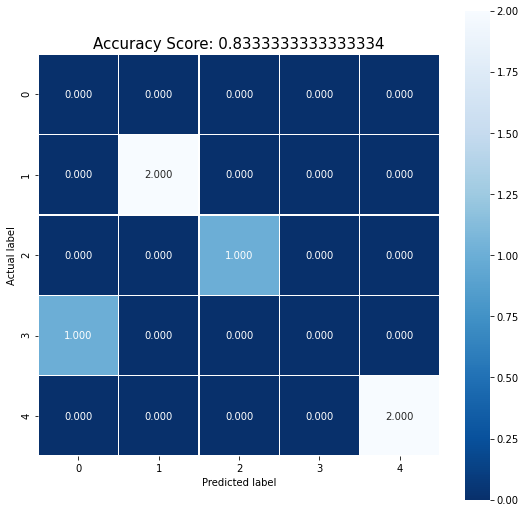

In [ ]:
accuracy=metrics.accuracy_score(testLabel, result)

# plot the confusion matrix
cm  = metrics.confusion_matrix(testLabel, result)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

#ANN PCA

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import decomposition

print(tf.__version__)
print(keras.__version__)
%load_ext tensorboard

Mnist=tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = Mnist.load_data()


train_images=train_images.reshape(-1,784)
test_images=test_images.reshape(-1,784)

2.2.0-rc3
2.3.0-tf
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
print(train_images.dtype)
print(train_images.shape)

uint8
(60000, 784)


In [ ]:
#Normalizing
valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]


train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images / 255.0

print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 784)
(5000, 784)
(10000, 784)


In [ ]:
pca = decomposition.PCA(n_components=300, whiten=True).fit(train_images)
trainImage_PCA = pca.transform(train_images)
testImage_PCA = pca.transform(test_images)
validImage_PCA= pca.transform(valid_images)

train_images=trainImage_PCA
test_images=testImage_PCA
valid_images=validImage_PCA


In [ ]:
print(train_images.shape)
print(test_images.shape)

(55000, 300)
(10000, 300)


In [ ]:
#Sample 1
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(data_format=None), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.Adamax(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))


Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3264 - accuracy: 0.9019 - val_loss: 3.5437 - val_accuracy: 0.1126
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1183 - accuracy: 0.9645 - val_loss: 3.5393 - val_accuracy: 0.1126
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 4.5691 - val_accuracy: 0.1126
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 5.1102 - val_accuracy: 0.1126
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0173 - accuracy: 0.9951 - val_loss: 5.5181 - val_accuracy: 0.1126
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0100 - accuracy: 0.9974 - val_loss: 6.1716 - val_accuracy: 0.1126
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0054 - accuracy: 0.9989 - val_loss: 6.0840 - val_accuracy:

In [ ]:
#Best Accuracy Achieved
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(data_format=None), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=50,validation_data=(valid_images, valid_labels))

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8651 - val_loss: 3.1960 - val_accuracy: 0.0868
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1633 - accuracy: 0.9531 - val_loss: 3.3564 - val_accuracy: 0.1100
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0961 - accuracy: 0.9721 - val_loss: 4.0904 - val_accuracy: 0.1126
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9827 - val_loss: 4.5134 - val_accuracy: 0.1126
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 5.0896 - val_accuracy: 0.1126
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 5.2392 - val_accuracy: 0.1126
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9942 - val_loss: 5.9585 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


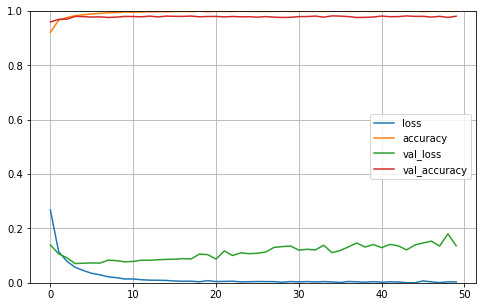

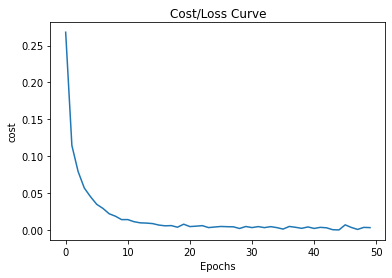

In [ ]:
#Cost/Loss
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.9580


[0.42036375403404236, 0.9580000042915344]

In [ ]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.9591


[0.4004792869091034, 0.9591000080108643]